In [1]:
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import pickle
import nltk
import re
from nltk.stem import PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

In [3]:
train_data = pd.read_csv('train.txt',header=None,sep =';',names=['Comment','Emotion'],encoding='utf-8')
train_data['length'] = [len(x) for x in train_data['Comment']]

In [4]:
train_data.head(3)

,Comment,Emotion,length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48


In [5]:
train_data2 = train_data.copy()

In [6]:
train_data.shape

(16000, 3)

In [7]:
train_data.isnull().sum()

Comment    0
Emotion    0
length     0
dtype: int64

In [8]:
train_data.duplicated().sum()

1

In [9]:
train_data.drop_duplicates(inplace=True)

# Some EDA

In [10]:
train_data['Emotion'].value_counts()

joy         5361
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotion, dtype: int64

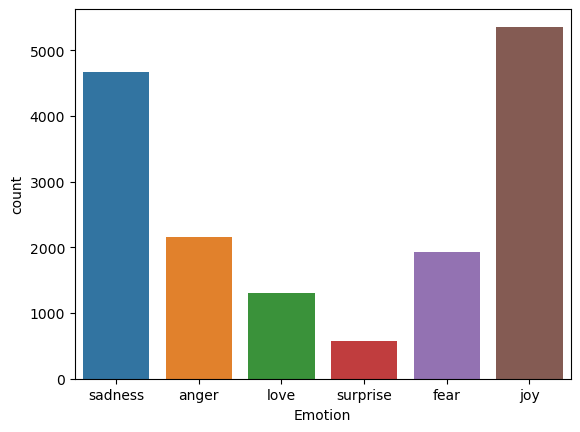

In [11]:
sns.countplot(x = train_data['Emotion'])
plt.show()

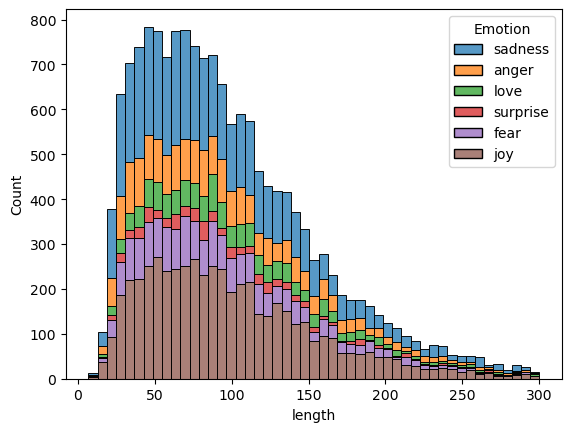

In [12]:
df2 = train_data.copy()
lenght_values = df2['length'].values
sns.histplot(data=df2,x='length',hue='Emotion',multiple='stack')
plt.show()

In [13]:
train_data.head(3)

,Comment,Emotion,length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48


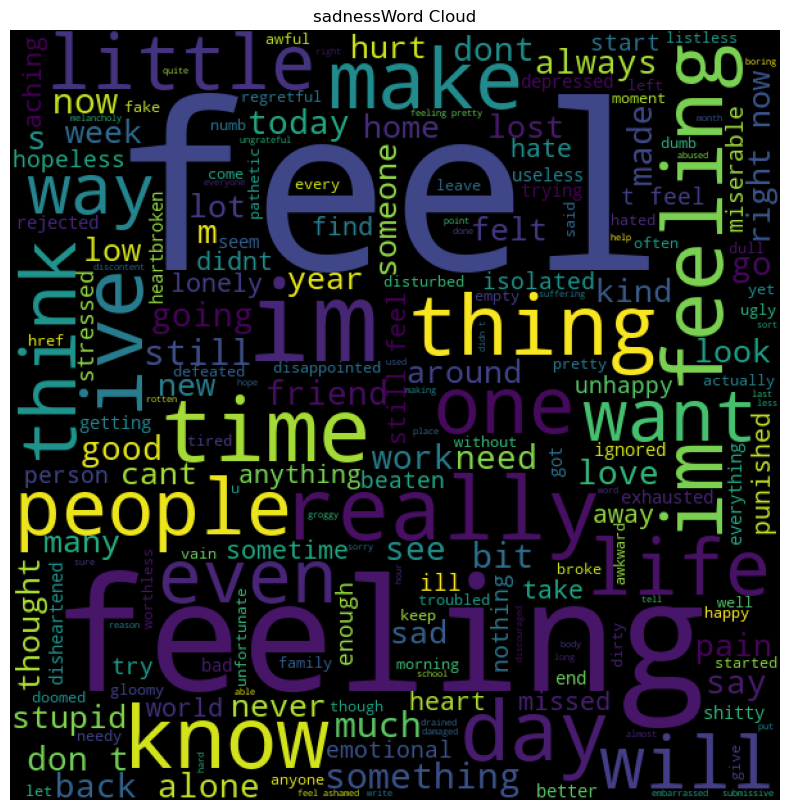

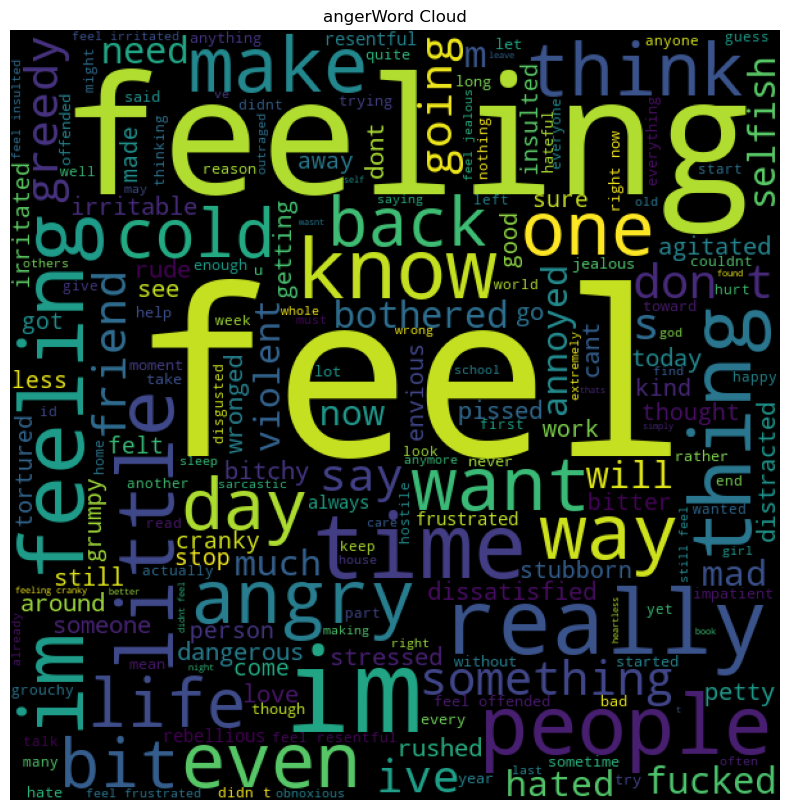

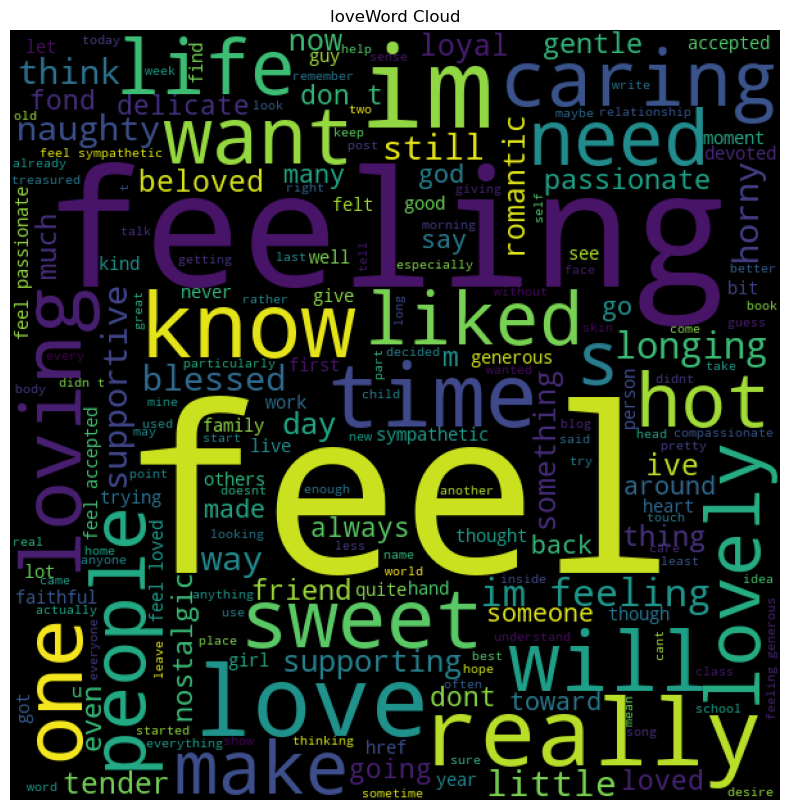

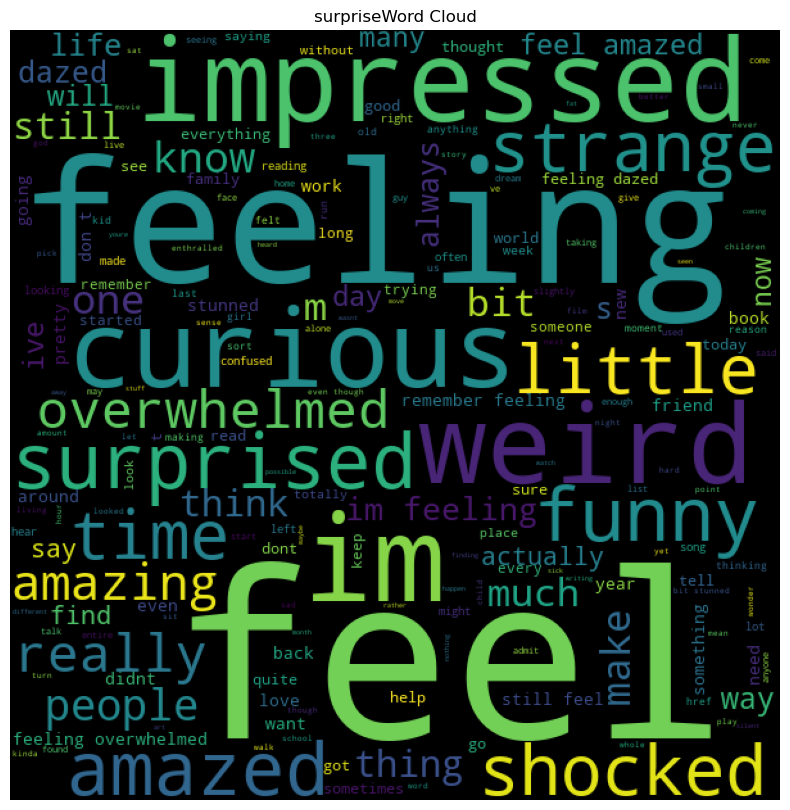

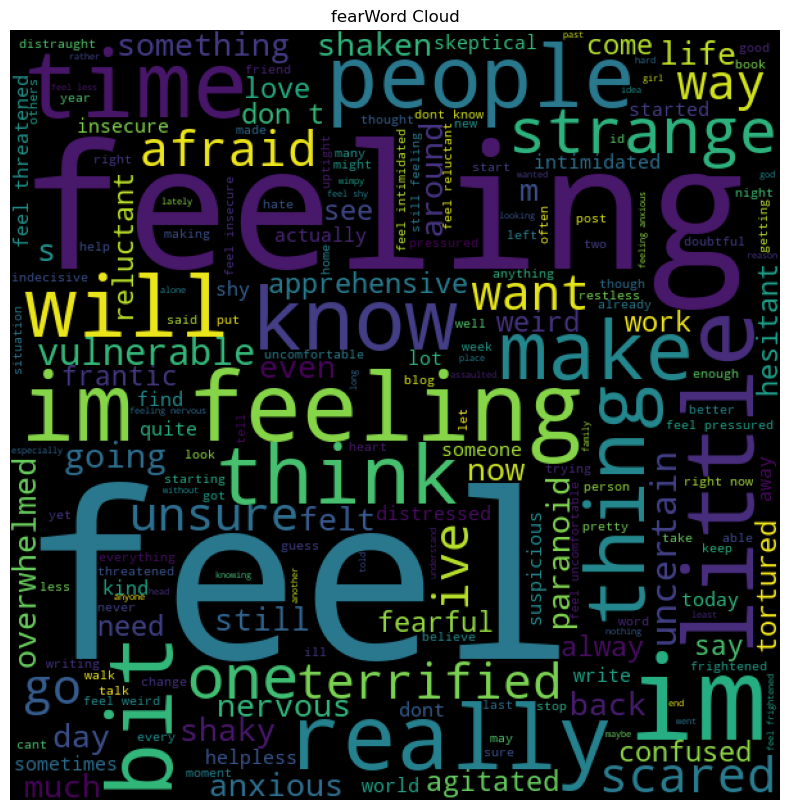

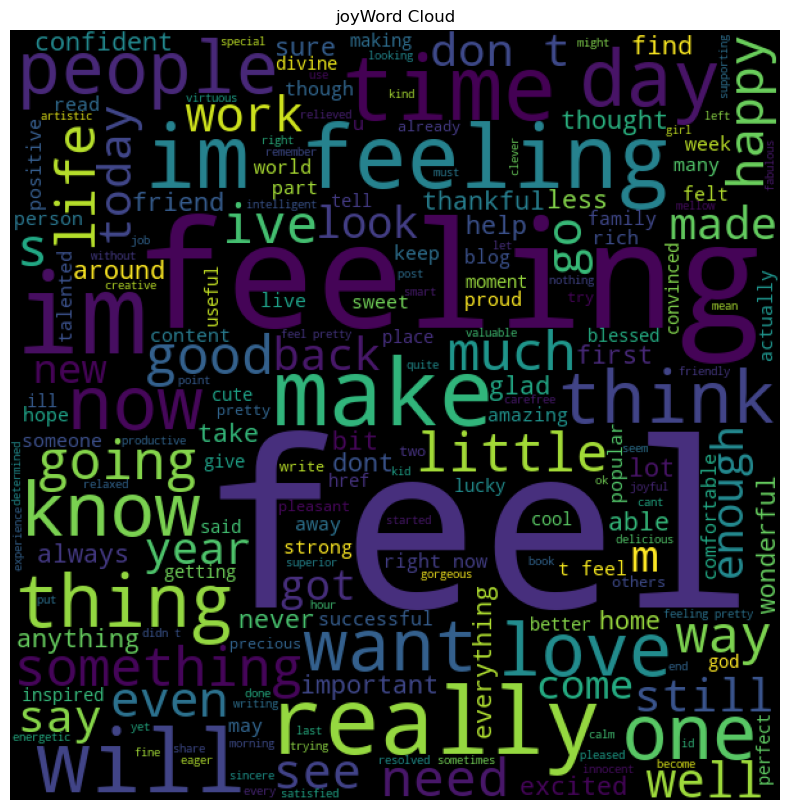

In [14]:
def words_cloud(wordcloud,emotion):
    plt.figure(figsize=(10,10))
    plt.title(emotion+"Word Cloud")
    plt.imshow(wordcloud)
    plt.axis("off")
emotions_list = train_data['Emotion'].unique()#sab ky sab unique words yaha store ho jyei gy list mai
for emotion in emotions_list:# list key andr trawarse krein gy
    text = " ".join([sentence for sentence in train_data.loc[train_data['Emotion']==emotion,'Comment']])
    wordcloud = WordCloud(width=600,height=600).generate(text)
    words_cloud(wordcloud,emotion)
    
    
    

In [15]:
for emotion in emotions_list:
    print(emotion)

sadness
anger
love
surprise
fear
joy


In [16]:
# import pandas as pd

# data = {
#     'Name': ['Alice', 'Bob', 'Charlie', 'David'],
#     'Age': [24, 27, 22, 32],
#     'City': ['New York', 'Los Angeles', 'Chicago', 'Houston']
# }

# df = pd.DataFrame(data)

In [17]:
# df

In [18]:
#  df.loc[1]

In [19]:
# df.loc[3,'Age']


In [20]:
# df.loc[0,['Age','City']]

In [21]:
lb =LabelEncoder()
train_data['Emotion_Encoded']=lb.fit_transform(train_data['Emotion'])

In [22]:
train_data

,Comment,Emotion,length,Emotion_Encoded
0,i didnt feel humiliated,sadness,23,4
1,i can go from feeling so hopeless to so damned...,sadness,108,4
2,im grabbing a minute to post i feel greedy wrong,anger,48,0
3,i am ever feeling nostalgic about the fireplac...,love,92,3
4,i am feeling grouchy,anger,20,0
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101,4
15996,i am now turning and i feel pathetic that i am...,sadness,102,4
15997,i feel strong and good overall,joy,30,2
15998,i feel like this was such a rude comment and i...,anger,59,0


In [23]:
stopwords = set(nltk.corpus.stopwords.words('english'))
def clean_text(text):
    stemmer = PorterStemmer()
    text = re.sub("[^a-zA-z]"," ",text)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    return " ".join(text)

In [24]:
train_data['cleaned_comment'] =train_data['Comment'].apply(clean_text)

In [25]:
train_data

,Comment,Emotion,length,Emotion_Encoded,cleaned_comment
0,i didnt feel humiliated,sadness,23,4,didnt feel humili
1,i can go from feeling so hopeless to so damned...,sadness,108,4,go feel hopeless damn hope around someon care ...
2,im grabbing a minute to post i feel greedy wrong,anger,48,0,im grab minut post feel greedi wrong
3,i am ever feeling nostalgic about the fireplac...,love,92,3,ever feel nostalg fireplac know still properti
4,i am feeling grouchy,anger,20,0,feel grouchi
...,...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101,4,brief time beanbag said anna feel like beaten
15996,i am now turning and i feel pathetic that i am...,sadness,102,4,turn feel pathet still wait tabl sub teach degre
15997,i feel strong and good overall,joy,30,2,feel strong good overal
15998,i feel like this was such a rude comment and i...,anger,59,0,feel like rude comment im glad


In [26]:
X_train, X_test, y_train, y_test = train_test_split(train_data['cleaned_comment'],train_data['Emotion_Encoded'] , test_size=0.2, random_state=42)

In [27]:
tfidf_vectorizor = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizor.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizor.transform(X_test)

In [28]:
classifiers = {
    "Multinominal": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM":SVC()   
}
for name, clf in classifiers.items():
    print(f"\=========={name}===========")
    clf.fit(X_train_tfidf,y_train)
    y_pred_tfidf = clf.predict(X_test_tfidf)
    print(f"\nAccuracy using TF-IDF:{accuracy_score(y_test,y_pred_tfidf)}")
    print("Classification Report: ")
    print(classification_report(y_test,y_pred_tfidf))

\==========Multinominal===========

Accuracy using TF-IDF:0.6590625
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.32      0.48       439
           1       0.88      0.23      0.37       375
           2       0.58      0.98      0.73      1027
           3       1.00      0.03      0.05       303
           4       0.72      0.91      0.80       950
           5       1.00      0.02      0.04       106

    accuracy                           0.66      3200
   macro avg       0.85      0.42      0.41      3200
weighted avg       0.76      0.66      0.59      3200

\==========Logistic Regression===========

Accuracy using TF-IDF:0.825
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       439
           1       0.85      0.72      0.78       375
           2       0.76      0.94      0.84      1027
           3       0.84      0.47      0.60       303

In [29]:
lg = LogisticRegression()
lg.fit(X_train_tfidf,y_train)
y_pred_lg = lg.predict(X_test_tfidf)

In [30]:
def predict_emotion(input_text):
    cleaned_text = clean_text(input_text)
    input_vectorized = tfidf_vectorizor.transform([cleaned_text])
    predicted_label = lg.predict(input_vectorized)[0]
    predicted_emotion = lb.inverse_transform([predicted_label])[0]
    label = np.max(lg.predict(input_vectorized)[0])
    return predicted_emotion, label

In [31]:
sentences = [
    "I didn't feel humiliated",
    "I feel strong overall",
    "I am grabbing a minute to post, I feel greedy and wrong",
    "He was speechless when he found out he was accepted to this job"
]

# Predicting emotion for each sentence
for send in sentences:
    print(send)
    emotion, label = predict_emotion(send)
    print("Predicted Emotion: ", emotion)
    print("Predicted Label: ", label)
    print("===========================")

    

I didn't feel humiliated
Predicted Emotion:  sadness
Predicted Label:  4
I feel strong overall
Predicted Emotion:  joy
Predicted Label:  2
I am grabbing a minute to post, I feel greedy and wrong
Predicted Emotion:  anger
Predicted Label:  0
He was speechless when he found out he was accepted to this job
Predicted Emotion:  joy
Predicted Label:  2


In [32]:
pickle.dump(lg,open('logistic_regression.pkl','wb'))
pickle.dump(lb,open("labelencoder.pkl",'wb'))
pickle.dump(tfidf_vectorizor,open("tfidf_vectorizer.pkl",'wb'))

# Deep Learning

In [36]:
stopwords = set(nltk.corpus.stopwords.words('english'))

In [64]:
def clean_text(df,column,vocab_size,max_len):
    stemmer = PorterStemmer()
    
    corpus = []
    for text in df[column]:
        text = re.sub('[^a-zA-Z]',' ', text)
        text = text.lower()
        text = text.split()
        text = [stemmer.stem(w) for w in text if w not in stopwords]
        text = " ".join(text)
        corpus.append(text)
        
    one_hot_word = [one_hot(input_text=word,n=vocab_size)for word in corpus]
    pad = pad_sequences(sequences=one_hot_word,maxlen=max_len,padding='pre')
    return pad
    
x_train = clean_text(train_data2,'Comment',vocab_size = 11000,max_len = 300)
        

In [65]:
lb = LabelEncoder()
train_data2['Emotion'] = lb.fit_transform(train_data2['Emotion'])

In [66]:
y_train = to_categorical(train_data2['Emotion'])

In [67]:
model = Sequential()
model.add(Embedding(input_dim =11000,output_dim=150,input_length=300))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(64,activation="sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))
model.compile(optimizer="adam",loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5,batch_size=64,verbose=1)

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 128s 490ms/step - accuracy: 0.3667 - loss: 1.5848
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 133s 530ms/step - accuracy: 0.7574 - loss: 0.7223
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 135s 541ms/step - accuracy: 0.9040 - loss: 0.3189
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 137s 518ms/step - accuracy: 0.9337 - loss: 0.2008
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 147s 537ms/step - accuracy: 0.9538 - loss: 0.1488


In [73]:
def pred(text):    
    stemmer = PorterStemmer()
    corpus = []
    text = re.sub('[^a-zA-Z]',' ', text)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(w) for w in text if w not in stopwords]
    text = " ".join(text)
    corpus.append(text)
        
        
    one_hot_word = [one_hot(input_text=word,n=11000)for word in corpus]
    pad = pad_sequences(sequences=one_hot_word,maxlen=300,padding='pre')
    return pad
    
    


sentences = [
    'I hates mangos',
    'I feel strong anad good overall',
    'He is really sweet and caring', 
]
for sent in sentences:
    clean_sent=pred(sent)
    emotion = lb.inverse_transform(np.argmax(model.predict(clean_sent),axis=-1))[0]
    label = np.max(model.predict(clean_sent))
    print(emotion)
    print(label)
    print("=====================")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
0
0.5469775
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
2
0.9958781
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
3
0.71861184


In [74]:
model.save('model.h5')